In [62]:
import numpy as np
import math
import sys
import pandas as pd
import os
#visualization
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import seaborn as sb

from sklearn.cross_validation import train_test_split , StratifiedKFold
from sklearn.linear_model import LogisticRegression, LassoLarsCV,Ridge

/home/proy/Work/ML/local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
os.getcwd()


'/home/proy/Work/Projects/House price'

In [3]:
#getting dataframe
traindf = pd.read_csv("all/train.csv")
testdf = pd.read_csv("all/test.csv")

In [4]:
#creating whole data frame
wholedf = pd.concat([traindf,testdf], sort= False)

In [5]:
# wholedf.info()
# wholedf.head()

/home/proy/Work/ML/local/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


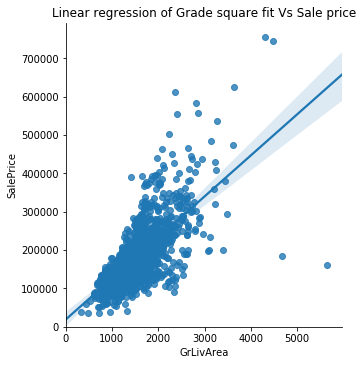

In [6]:
sb.lmplot(x = "GrLivArea", y = "SalePrice" , data = wholedf)
plt.title("Linear regression of Grade square fit Vs Sale price")
plt.ylim(0,)
plt.show()

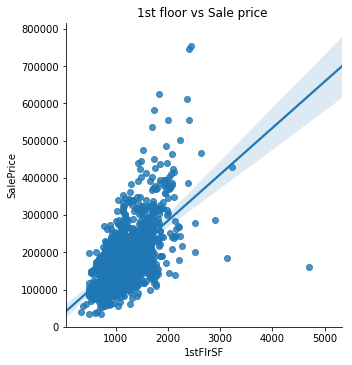

In [7]:
sb.lmplot(x= "1stFlrSF", y = "SalePrice", data=wholedf)
sb.set_palette("bright",3)
# sb.palplot()
plt.title("1st floor vs Sale price ")
plt.ylim(0,)
plt.show()

In [8]:
#check the correlation 
traincorr = traindf.corr()['SalePrice']
traincorr = pd.DataFrame(traincorr)#convert series to dataframe so thet it can be sorted
traincorr.columns = ["Correlation"]
#sort correlatioin 
traincorr2 = traincorr.sort_values(by=['Correlation'], ascending=False)
traincorr2.head(15)

,Correlation
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


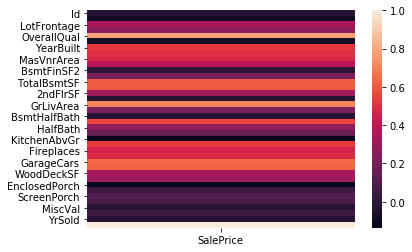

In [9]:
corr = wholedf.corr()["SalePrice"]
corr = pd.DataFrame(corr)
sb.heatmap(corr)
plt.show()

In [67]:
# dealnhg with missing values

datatype = wholedf.dtypes
countmissing = wholedf.isnull().sum().sort_values(ascending =False)
# countmissing2 = wholedf.isnull().count()
percentmissing = (wholedf.isnull().sum()/wholedf.isnull().count())
wholena = pd.concat([countmissing,percentmissing,datatype], axis = 1,sort =False)
wholena.columns = ["Missing Count","Missing Percentage","Type"]
wholena.sort_values(["Missing Count"], ascending = False).head(20)

,Missing Count,Missing Percentage,Type
PoolQC,2909,0.996574,object
MiscFeature,2814,0.964029,object
Fence,2348,0.804385,object
SalePrice,1459,0.499829,float64
GarageQual,159,0.054471,object
GarageCond,159,0.054471,object
GarageType,157,0.053786,object
BsmtCond,82,0.028092,object
BsmtQual,81,0.027749,object
MSZoning,4,0.001370,object


In [11]:
#check which is dominant then return


# wholedf[['Utilities', "Id"]].groupby(["Utilities"], as_index =False).count()
wholedf['Utilities'] = wholedf['Utilities'].fillna("AllPub")
# wholedf[['Functional', "Id"]].groupby(["Functional"], as_index =False).count()
wholedf['Functional'] = wholedf['Functional'].fillna("Typ")
# wholedf[['Electrical', "Id"]].groupby(["Electrical"], as_index =False).count()
wholedf['Electrical'] = wholedf['Electrical'].fillna("SBrkr")
# wholedf[['Exterior2nd', "Id"]].groupby(["Exterior2nd"], as_index =False).count()
wholedf['Exterior2nd'] = wholedf['Exterior2nd'].fillna("VinylSd")
# wholedf[['Exterior1st', "Id"]].groupby(["Exterior1st"], as_index =False).count()
wholedf['Exterior1st'] = wholedf['Exterior1st'].fillna("VinylSd")


In [12]:
## missing integer values and replace it with median()

In [19]:
# wholedf[''] = wholedf[''].fillna(wholedf[''].median())
wholedf['BsmtFullBath'] = wholedf['BsmtFullBath'].fillna(wholedf['BsmtFullBath'].median())
wholedf['BsmtHalfBath'] = wholedf['BsmtHalfBath'].fillna(wholedf['BsmtHalfBath'].median())
wholedf['GarageCars'] = wholedf['GarageCars'].fillna(wholedf['GarageCars'].median())


## missing value to be replaced with mean fro better accuracy
# wholedf[''] = wholedf[''].fillna(wholedf[''].mean())
wholedf['BsmtUnfSF'] = wholedf['BsmtUnfSF'].fillna(wholedf['BsmtUnfSF'].mean())
wholedf['BsmtFinSF1'] = wholedf['BsmtFinSF1'].fillna(wholedf['BsmtFinSF1'].mean())
wholedf['GarageArea'] = wholedf['GarageArea'].fillna(wholedf['GarageArea'].mean())
wholedf['MasVnrArea'] = wholedf['MasVnrArea'].fillna(wholedf['MasVnrArea'].mean())
wholedf['BsmtFinSF2'] = wholedf['BsmtFinSF2'].fillna(wholedf['BsmtFinSF2'].mean())

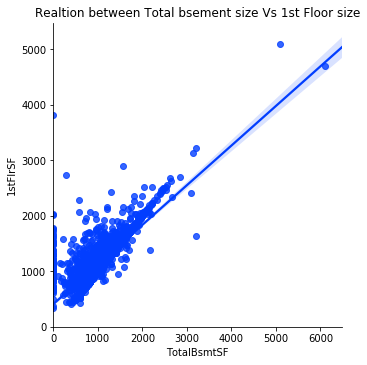

In [23]:
## some filled can not be less than sopme fields
wholedf['GarageYrBlt'].fillna(wholedf.YearBuilt, inplace  =True)
wholedf['TotalBsmtSF'].fillna(wholedf['1stFlrSF'], inplace  =True)

##plot
sb.lmplot(x = 'TotalBsmtSF', y ='1stFlrSF', data = wholedf)
plt.title("Realtion between Total bsement size Vs 1st Floor size")
plt.ylim(0,)
plt.xlim(0,)
plt.show()

In [26]:
lot = wholedf[['LotArea','LotConfig','LotFrontage','LotShape']]
lot = pd.get_dummies(lot)
lot.corr()['LotFrontage']

LotArea              0.489896
LotFrontage          1.000000
LotConfig_Corner     0.257028
LotConfig_CulDSac   -0.104612
LotConfig_FR2       -0.056992
LotConfig_FR3        0.027509
LotConfig_Inside    -0.162484
LotShape_IR1         0.151502
LotShape_IR2        -0.011356
LotShape_IR3         0.139550
LotShape_Reg        -0.164639
Name: LotFrontage, dtype: float64

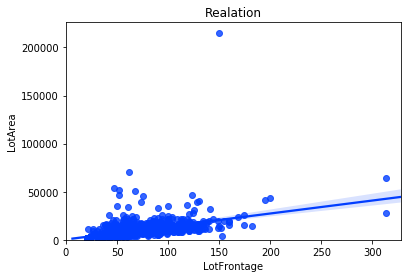

In [28]:
sb.regplot(x = 'LotFrontage', y = 'LotArea', data =lot)
plt.title("Realation")
plt.xlim(0,)
plt.ylim(0,)
plt.show()

In [39]:
lot['LotAreaSqrt'] = np.sqrt(lot['LotArea'])
lot = lot[lot.LotFrontage.notnull()]

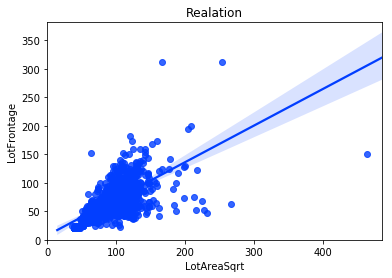

In [40]:
sb.regplot(y = 'LotFrontage', x = 'LotAreaSqrt', data =lot)
plt.title("Realation")
plt.xlim(0,)
plt.ylim(0,)
plt.show()

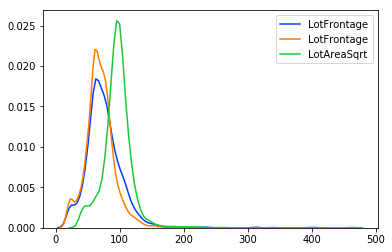

In [42]:
wholedf['LotFrontage'] = wholedf['LotFrontage'].fillna(np.sqrt(wholedf['LotArea']))
wholedf.LotFrontage = wholedf.LotFrontage.astype(int)
# chech distribution
sb.kdeplot(wholedf.LotFrontage)
sb.kdeplot(lot.LotFrontage)
sb.kdeplot(lot.LotAreaSqrt)
plt.show()

In [45]:
countmissing = wholedf.isnull().sum().sort_values(ascending = False)
percentmissing = (wholedf.isnull().sum()/wholedf.isnull().count()).sort_values(ascending = False)
wholena= pd.concat([countmissing,percentmissing],axis = 1)
wholena.head(5)

,0,1
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice,1459,0.499829


In [51]:
#feature engineering
Livingtotalsq = wholedf['TotalBsmtSF']+ wholedf['1stFlrSF'] +wholedf['2ndFlrSF']+wholedf['GarageArea']+wholedf['WoodDeckSF']+wholedf['OpenPorchSF']
wholedf['LivingTotalSF'] = Livingtotalsq

#total percent of living area by lot area
wholedf['PercentSQtoLot'] = wholedf['LivingTotalSF']/ wholedf['LotArea']
wholedf['TotalBaths'] = wholedf['BsmtFullBath']+wholedf['BsmtHalfBath']+wholedf['HalfBath']+wholedf['FullBath']
wholedf['PercentBedroom'] = wholedf['BedroomAbvGr']/wholedf['TotRmsAbvGrd']
# no of years since remodelled
wholedf['YearSinceRemodel'] = 2016 - ((wholedf['YearRemodAdd'] - wholedf['YearBuilt']) + wholedf['YearBuilt'])

In [52]:
pricing1 = wholedf[['Id','SalePrice','MiscVal']]


In [53]:
neigh = wholedf[['Neighborhood','MSZoning','MSSubClass','BldgType','HouseStyle']]

In [54]:
dates = wholedf[['YearBuilt','YearRemodAdd','GarageYrBlt','YearSinceRemodel']]
quacon = wholedf[['ExterQual','BsmtQual','PoolQC','Condition1','Condition2','SaleCondition','BsmtCond','ExterCond','GarageCond','KitchenQual','GarageQual','HeatingQC','OverallQual','OverallCond']]

In [57]:
features =  wholedf[['Foundation','RoofStyle','RoofMatl','Exterior1st','Exterior2nd', 'MiscFeature','PavedDrive','Utilities','Heating','CentralAir','Electrical','Fence']]
sqfoot = wholedf[['LivingTotalSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','LotArea','PercentSQtoLot','LowQualFinSF']]
roomfeatcount = wholedf[['PercentBedroom','TotalBaths','FullBath','HalfBath','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageType','EnclosedPorch']]

In [58]:
pricing = wholedf['SalePrice']
pricing = pricing[pricing.notnull()]

In [69]:
wholedf = pd.concat([pricing1,neigh,dates,quacon,features,sqfoot,roomfeatcount], axis=1)

In [70]:
wholedf  = pd.get_dummies(wholedf)

In [71]:
traincorr  = wholedf.corr()['SalePrice']
traincorr = pd.DataFrame(traincorr)
traincorr.columns = ["Correlation"]
traicorr2 = traincorr.sort_values(by=['Correlation'], ascending=False)
traincorr2.head(15)

,Correlation
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [72]:
train_x = wholedf[wholedf['SalePrice'].notnull()]
del train_x['SalePrice']
test_X = wholedf[wholedf['SalePrice'].isnull()]
del test_X['SalePrice']

In [73]:
train_valid_X = train_x
train_valid_y = pricing
test_x = test_X
train_X, valid_X, train_y, valid_y = train_test_split(train_valid_X, train_valid_y, train_size = .7)

In [77]:
# modelling 
# model = Ridge()
model = LassoLarsCV()
model.fit(train_X,train_y)
print(model.score(train_X, train_y), model.score(valid_X, valid_y))

/home/proy/Work/ML/local/lib/python2.7/site-packages/sklearn/linear_model/least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 76 iterations, i.e. alpha=3.267e+01, with an active set of 76 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/home/proy/Work/ML/local/lib/python2.7/site-packages/sklearn/linear_model/least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 104 iterations, i.e. alpha=1.633e+01, with an active set of 100 regressors, and the smallest cholesky pivot element being 2.980e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/home/proy/Work/ML/local/lib/python2.7/site-packages/sklearn/linear_model/least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 104 iterations, i.e. alpha=1.633e+01, with an active set of 100 reg

(0.890989009262134, 0.8747615456419687)


In [78]:
id = test_X.Id
result = model.predict(test_X)

output = pd.DataFrame({'id':id, 'SalePrice':result} )
output = output[['id','SalePrice']]
output.to_csv("solution.csv",index = False)
output.head(20)

,id,SalePrice
0,1461,119065.246691
1,1462,166081.762599
2,1463,175718.446510
3,1464,194739.874756
4,1465,218212.953531
5,1466,178615.372647
6,1467,180276.430065
7,1468,167268.107256
8,1469,192816.930008
9,1470,116440.472420
